In [11]:
import pandas as pd
import numpy as np

# Data Reading

In [259]:
movies = pd.read_csv("/Users/iamktrisal/Downloads/ml-20m/movies.csv")
ratings = pd.read_csv("/Users/iamktrisal/Downloads/ml-20m/ratings.csv")

# Getting Data Insights

In [272]:
movies.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [247]:
movies.head()

,movieId,title,genres,genre_count,year,decade
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1995,1990
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,1995,1990
2,3,Grumpier Old Men (1995),Comedy|Romance,2,1995,1990
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,1995,1990
4,5,Father of the Bride Part II (1995),Comedy,1,1995,1990


In [249]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


# Merging, Cleaning and Formatting the datasets  (merging on : "movieId")
            

In [313]:
# Perform an inner join on the movieId column
merged_df = pd.merge(movies, ratings, on='movieId', how='inner')

# Group by movieId and aggregate relevant columns
grouped_df = merged_df.groupby('movieId').agg(
    title=('title', 'first'),  # Keep the first title for each movieId
    genres=('genres', 'first'),  # Keep the first genres for each movieId
    avg_rating=('rating', 'mean'),  # Calculate the average rating
    total_ratings=('rating', 'count')  # Count the total number of ratings
).reset_index()

# Display the result
grouped_df.round(1).head()

,movieId,title,genres,avg_rating,total_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.2,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.2,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.9,2756
4,5,Father of the Bride Part II (1995),Comedy,3.1,12161


In [315]:
# Check for any null values in the entire DataFrame
print(grouped_df.isnull().values.any())

False


In [323]:
# Drop rows with "no genres listed" in grouped_df
grouped_df = grouped_df[grouped_df['genres'] != '(no genres listed)']

# Verify the updated DataFrame
print(f'Rows after removing "no genres listed": {grouped_df.shape[0]}')

Rows after removing "no genres listed": 26502


In [331]:
# Remove duplicates
grouped_df.drop_duplicates()

,movieId,title,genres,avg_rating,total_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161
...,...,...,...,...,...
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.000000,1
26739,131254,Kein Bund für's Leben (2007),Comedy,4.000000,1
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.000000,1
26741,131258,The Pirates (2014),Adventure,2.500000,1


# QUESTION 1 : (Analysing the Movies dataset)


### A) Number of unique movies associated with multiple genres
###    B) Movie with max genres
###    C) Distribution of movies across genres

                 Genre  Number of Movies
0                Drama             13344
1               Comedy              8374
2             Thriller              4178
3              Romance              4127
4               Action              3520
5                Crime              2939
6               Horror              2611
7          Documentary              2471
8            Adventure              2329
9               Sci-Fi              1743
10             Mystery              1514
11             Fantasy              1412
12                 War              1194
13            Children              1139
14             Musical              1036
15           Animation              1027
16             Western               676
17           Film-Noir               330
18  (no genres listed)               246
19                IMAX               196
Number of unique movies with multiple genres: 16449


Movie with the Maximum Number of Genres: 

Movie ID: 81132
Title: Rubber (2010)
Genre

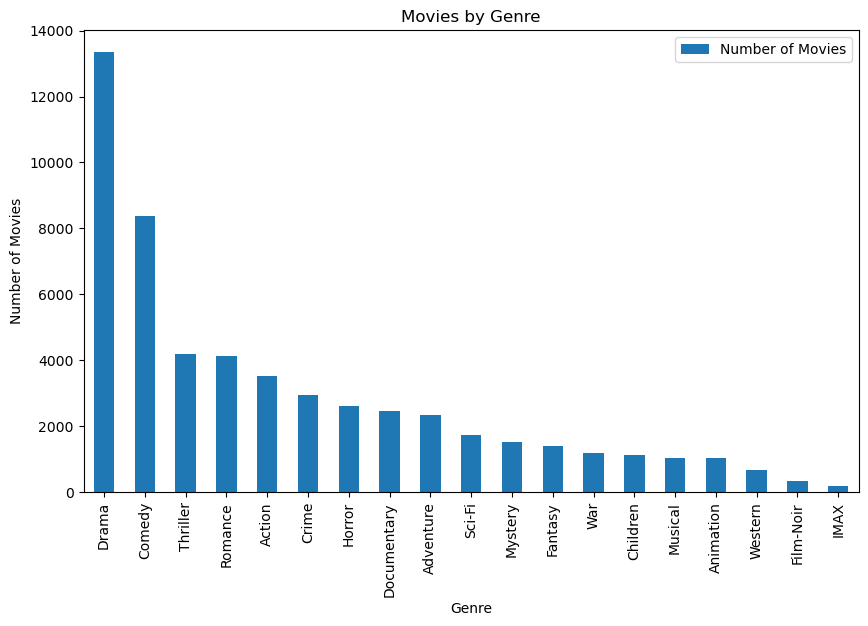

In [453]:
##### Number of unique movies associated with multiple genres

# Step 1: Split the genres into individual categories
genres_df = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')

# Step 2: Calculate the number of movies in each genre
genre_summary = genres_df['genres'].value_counts().reset_index()
genre_summary.columns = ['Genre', 'Number of Movies']

# Step 3: Calculate the number of unique movies associated with multiple genres
multiple_genres_count = genres_df.groupby('movieId').size()
num_movies_with_multiple_genres = (multiple_genres_count > 1).sum()
print(genre_summary)

# Print the number of unique movies associated with multiple genres
print("Number of unique movies with multiple genres:", num_movies_with_multiple_genres)
print("\n")

##### Movie with max genres

# Step 1: Create the `genre_count` column
movies['genre_count'] = movies['genres'].str.split('|').apply(len)

# Step 2: Find the maximum number of genres
max_genre_count = movies['genre_count'].max()

# Step 3: Filter movies with the maximum number of genres
movies_with_most_genres = movies[movies['genre_count'] == max_genre_count]

print("Movie with the Maximum Number of Genres: \n")
for _, row in movies_with_most_genres.iterrows():
    print(f"Movie ID: {row['movieId']}")
    print(f"Title: {row['title']}")
    print(f"Genres: {', '.join(row['genres'].split('|'))}")
    print(f"Number of Genres: {row['genre_count']}")
    print("-" * 50)



####### Distribution of movies across genres

import matplotlib.pyplot as plt

# Exclude "(no genres listed)"
filtered_genre_summary = genre_summary[genre_summary['Genre'] != '(no genres listed)']

# Plot the filtered data
filtered_genre_summary.sort_values(by='Number of Movies', ascending=False).plot(
    x='Genre', 
    y='Number of Movies', 
    kind='bar', 
    figsize=(10, 6), 
    title='Movies by Genre'
)

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Movies by Genre')
plt.show()


### Output of the summary saved

In [457]:
# Save Genre Summary
genre_summary.to_csv('genre_summary.csv', index=False)
print("Genre summary saved to 'genre_summary.csv'")

# Save Movies with Multiple Genres
multiple_genres_data = pd.DataFrame({
    'Description': ['Number of unique movies with multiple genres'],
    'Value': [num_movies_with_multiple_genres]
})
multiple_genres_data.to_csv('multiple_genres.csv', index=False)
print("Movies with multiple genres saved to 'multiple_genres.csv'")

# Save Movies with Maximum Genres
movies_with_most_genres.to_csv('movies_with_max_genres.csv', index=False)
print("Movies with maximum genres saved to 'movies_with_max_genres.csv'")

# Output Message
print("\nAll summaries have been saved successfully:")
print("1. Genre summary: 'genre_summary.csv'")
print("2. Movies with multiple genres: 'multiple_genres.csv'")
print("3. Movies with maximum genres: 'movies_with_max_genres.csv'")

Genre summary saved to 'genre_summary.csv'
Movies with multiple genres saved to 'multiple_genres.csv'
Movies with maximum genres saved to 'movies_with_max_genres.csv'

All summaries have been saved successfully:
1. Genre summary: 'genre_summary.csv'
2. Movies with multiple genres: 'multiple_genres.csv'
3. Movies with maximum genres: 'movies_with_max_genres.csv'


# Question 2 :
# Movies by Decade 
# Single Vs Multi-Genre movies by Decade

In [469]:
####  Movies by decade : 

# Step 1: Extract the year from the title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)

# Step 2: Categorize movies by decade
movies['decade'] = (movies['year'].astype(float) // 10 * 10).astype('Int64')

# Step 3: Summarize movies by decade
movies_by_decade = movies['decade'].value_counts().reset_index()
movies_by_decade.columns = ['Decade', 'Number of Movies']

# Step 4: Prepare genres for summarization
genres_df = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')


# Print results
print("Movies by Decade:\n", movies_by_decade)
print("\n")


##### Calculate single-genre and multi-genre counts by decade :

genre_type_ratio = movies.groupby('decade')['genre_count'].apply(
    lambda x: pd.Series({
        'Single-Genre Movies': (x == 1).sum(),
        'Multi-Genre Movies': (x > 1).sum()
    })
).unstack().reset_index()

print("Single-Genre vs Multi-Genre Movies by Decade:\n", genre_type_ratio)


Movies by Decade:
     Decade  Number of Movies
0     2000              7875
1     2010              4871
2     1990              4372
3     1980              2654
4     1970              2020
5     1960              1661
6     1950              1369
7     1940              1067
8     1930               929
9     1920               319
10    1910                97
11    1890                14
12    1900                 8


Single-Genre vs Multi-Genre Movies by Decade:
     decade  Single-Genre Movies  Multi-Genre Movies
0     1890                   14                   0
1     1900                    4                   4
2     1910                   58                  39
3     1920                  143                 176
4     1930                  299                 630
5     1940                  299                 768
6     1950                  513                 856
7     1960                  692                 969
8     1970                  792                1228
9     

### Output of the summary saved

In [471]:
# Save Movies by Decade Summary
movies_by_decade.to_csv('movies_by_decade.csv', index=False)
print("Movies by Decade summary saved to 'movies_by_decade.csv'")

# Save Single-Genre vs Multi-Genre Movies by Decade
genre_type_ratio.to_csv('genre_type_ratio.csv', index=False)
print("Single-Genre vs Multi-Genre Movies by Decade saved to 'genre_type_ratio.csv'")

# Confirmation message
print("\nFiles saved successfully:")
print("1. movies_by_decade.csv")
print("2. genre_type_ratio.csv")

Movies by Decade summary saved to 'movies_by_decade.csv'
Single-Genre vs Multi-Genre Movies by Decade saved to 'genre_type_ratio.csv'

Files saved successfully:
1. movies_by_decade.csv
2. genre_type_ratio.csv


# Question 3  (Analysing Movies and Ratings datsets)

### 	1.	Genres:
	•	Total movies produced in each genre.
	•	Average user ratings and total number of ratings for each genre.
###	2.	Decades:
	•	Total movies released in each decade.
	•	Average user ratings and total number of ratings for movies from each decade.


In [480]:

# Step 1: Generate Summary Statistics for `movies` Dataset
# Explode genres for genre-level statistics
genres_df = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')

# Total movies by genre
movies_per_genre = genres_df['genres'].value_counts().reset_index()
movies_per_genre.columns = ['Genre', 'Total Movies']

# Extract year and decade from the title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
movies['decade'] = (movies['year'].astype(float) // 10 * 10).astype('Int64')

# Total movies by decade
movies_per_decade = movies['decade'].value_counts().reset_index()
movies_per_decade.columns = ['Decade', 'Total Movies']

# Step 2: Generate Summary Statistics for `ratings` Dataset
# Average ratings by genre
ratings_by_genre = pd.merge(ratings, genres_df, on='movieId', how='inner')
avg_rating_by_genre = ratings_by_genre.groupby('genres').agg(
    avg_rating=('rating', 'mean'),
    total_ratings=('rating', 'count')
).reset_index()

# Average ratings by decade
ratings_by_decade = pd.merge(ratings, movies, on='movieId', how='inner')
avg_rating_by_decade = ratings_by_decade.groupby('decade').agg(
    avg_rating=('rating', 'mean'),
    total_ratings=('rating', 'count')
).reset_index()

# Step 3: Compare Summaries
# Merge genre summaries for comparison and remove duplicate column
genre_comparison = pd.merge(
    movies_per_genre, 
    avg_rating_by_genre, 
    left_on='Genre', 
    right_on='genres', 
    how='inner'
).drop(columns=['genres'])

# Merge decade summaries for comparison and remove duplicate column
decade_comparison = pd.merge(
    movies_per_decade, 
    avg_rating_by_decade, 
    left_on='Decade', 
    right_on='decade', 
    how='inner'
).drop(columns=['decade'])

# Step 4: Display Results
print("Genre Comparison:\n", genre_comparison.round(1).head())
print("\nDecade Comparison:\n", decade_comparison.round(1).head())

### Summary results saved:

# Step 5: Save Results
genre_comparison.to_csv('genre_comparison.csv', index=False)
decade_comparison.to_csv('decade_comparison.csv', index=False)


Genre Comparison:
       Genre  Total Movies  avg_rating  total_ratings
0     Drama         13344         3.7        8857853
1    Comedy          8374         3.4        7502234
2  Thriller          4178         3.5        5313506
3   Romance          4127         3.5        3802002
4    Action          3520         3.4        5614208

Decade Comparison:
    Decade  Total Movies  avg_rating  total_ratings
0    2000          7875         3.5        4780475
1    2010          4871         3.6         501646
2    1990          4372         3.4        8935220
3    1980          2654         3.5        3005510
4    1970          2020         3.8        1143995


# Other Analysis

In [484]:
# Average ratings by user
user_rating_distribution = ratings.groupby('userId').agg(
    avg_rating=('rating', 'mean'),
    total_ratings=('rating', 'count')
).reset_index()

# Display top users by total ratings
print(user_rating_distribution.sort_values(by='total_ratings', ascending=False).round(1).head())

        userId  avg_rating  total_ratings
118204  118205         3.3           9254
8404      8405         3.2           7515
82417    82418         3.5           5646
121534  121535         2.8           5520
125793  125794         3.8           5491


         genres  avg_rating  total_ratings
10    Film-Noir         4.0         216689
18          War         3.8        1048618
7   Documentary         3.7         244619
6         Crime         3.7        3298335
8         Drama         3.7        8857853
14      Mystery         3.7        1557282
12         IMAX         3.7         492366
3     Animation         3.6        1140476
19      Western         3.6         423714
13      Musical         3.6         870915


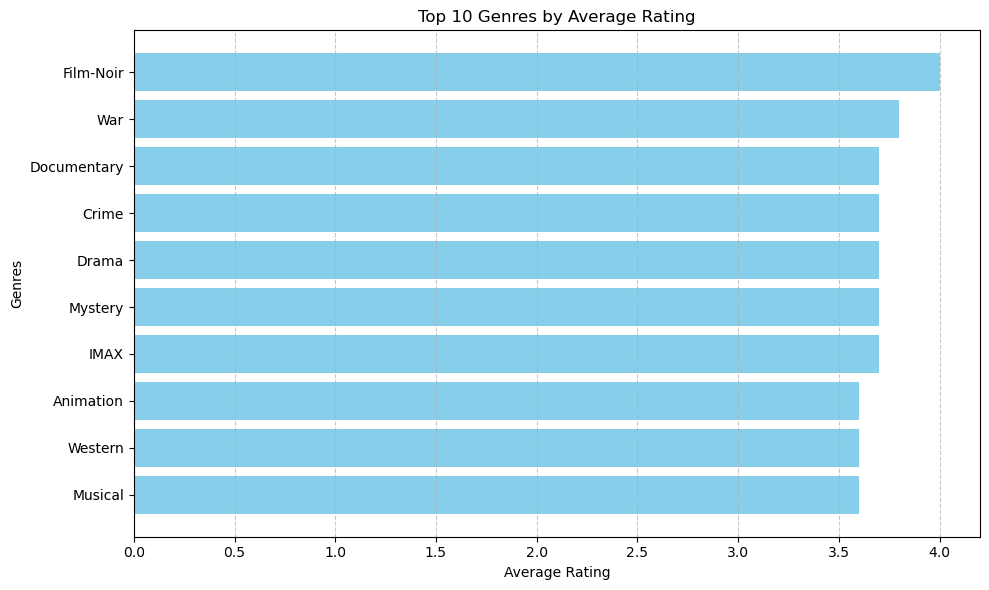

In [488]:
# Calculate average ratings for each genre
top_rated_genres = avg_rating_by_genre.sort_values(by='avg_rating', ascending=False)

# Display top genres
print(top_rated_genres.round(1).head(10))


import matplotlib.pyplot as plt

# Select top 10 genres for visualization and explicitly create a copy
top_rated_genres_top10 = top_rated_genres.head(10).copy()

# Round average ratings for cleaner display
top_rated_genres_top10['avg_rating'] = top_rated_genres_top10['avg_rating'].round(1)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_rated_genres_top10['genres'], top_rated_genres_top10['avg_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.title('Top 10 Genres by Average Rating')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest-rated genre at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()